**In this notebook, we will implement simple linear regression using scikit-learn. We will create, train and test a linear regression model on real data. This notebook is based on IBM Skills Network's Machine Learning with Python course.**

In [2]:
# download necessary packages
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 80.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.0 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.0 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 668.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 104.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


KeyboardInterrupt: 

In [1]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Load the data

In [2]:
#We will use the dataset that resides in the following url directly with the pandas library to load the dataset

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
#Let's verify if the dataset is successfully loaded by selecting some random records
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
308,2014,DODGE,CHARGER AWD FFV,FULL-SIZE,3.6,6,A8,E,17.3,11.7,14.8,19,237
278,2014,CHRYSLER,200 CONVERTIBLE FFV,COMPACT,3.6,6,A6,E,17.0,11.2,14.4,20,230
798,2014,MINI,COOPER S COUPE,TWO-SEATER,1.6,4,A6,Z,9.3,7.0,8.3,34,191
1028,2014,VOLKSWAGEN,CC 4MOTION,COMPACT,3.6,6,A6,Z,14.3,9.8,12.3,23,283
482,2014,HONDA,ACCORD,MID-SIZE,2.4,4,AV7,X,9.1,6.9,8.1,35,186


# Understanding the data

We are using a fuel consumption dataset which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.



*   MODEL YEAR e.g., 2014
*   MAKE e.g., VOLVO


*   MODEL e.g., S60 AWD
*   VEHICLE CLASS e.g., COMPACT

*   ENGINE SIZE e.g., 3.0

*   CYLINDERS e.g., 6

*   TRANSMISSION e.g., AS6

*  FUEL TYPE e.g.,Z

*   FUEL CONSUMPTION IN CITY (L/100km) e.g., 13.2

*   FUEL CONSUMPTION IN HWY (L/100 KM) e.g., 9.5
*   FUEL CONSUMPTION COMBINED (L/100KM) e.g., 9.5


*   FUEL CONSUMPTION COMBINED (L/100 KM) e.g., 11.5


*   FUEL CONSUMPTION COMBINED MPG (MPG) e.g. 25


*   CO2 EMISSIONS (g/km) e.g. 182

We will create a simple linear regression model from one of these features to predict CO2 emissions of unobserved cars based on that feature.







# DATA EXPLORATION

In [5]:
# consider the statistical summary of the data

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
# lets select a few features that might be indicative of CO2 emission to explore more

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
305,3.6,6,10.9,251
736,4.7,8,11.5,264
623,2.4,4,11.0,253
27,3.0,6,8.3,224
797,1.6,4,8.5,196
372,3.5,6,13.8,317
301,6.4,8,13.8,317
847,1.6,4,8.7,200
26,3.0,6,10.9,251


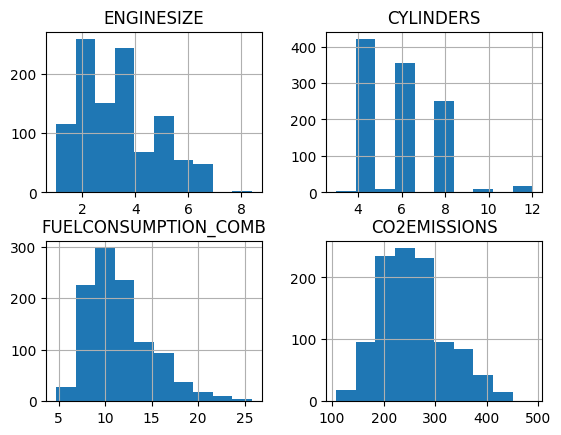

In [7]:
# lets visualize these features by plotting histograms
cdf.hist()
plt.show()



From the histograms, we can see that most engines have 4, 6 or 8 cylinders with engine sizes between 2 litres and 4 litres. The distribution of combined fuel consumption and CO2 emissions also look fairly similar.

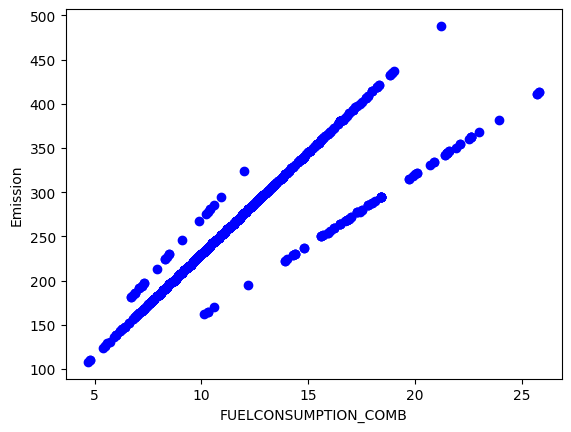

In [8]:
# Let's display scatterplots of these features against CO2 emissions to see how linear their relationships are.

plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel('Emission')
plt.show()

From the above scatterplot, we can see that there are 3 car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions. Their intercepts are similar, while their slopes are noticeably different.

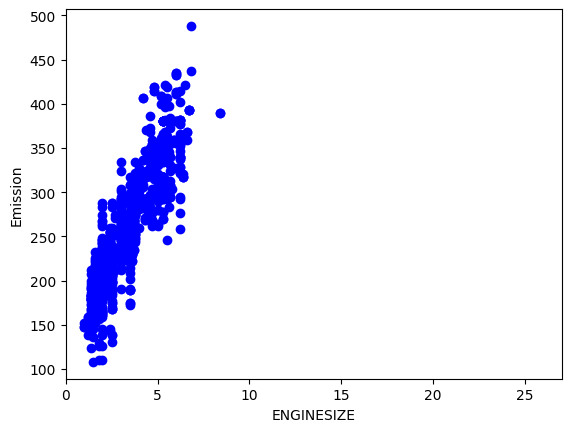

In [9]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel('Emission')
plt.xlim(0,27)
plt.show()

Although there is a linear relationship between engine size and CO2 emission, their correlation is weaker than that for each of the three fuel consumption groups.

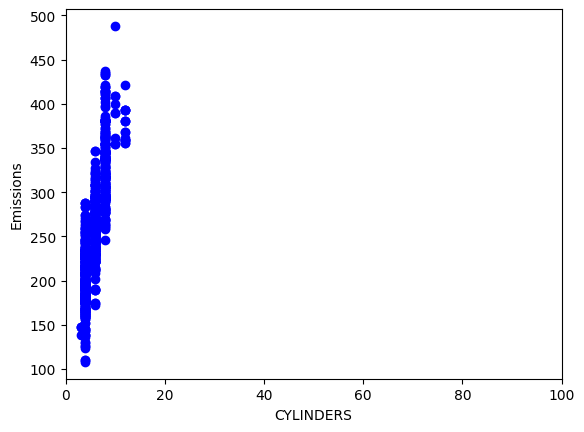

In [10]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emissions")
plt.xlim(0,100)
plt.show()

# EXTRACT THE INPUT FEATURE AND LABELS FROM THE DATASET

Lets use engine size to predict CO2 emission with a linear regression model.
Let's extract the input feature and target output variables, X and y, from the dataset.

In [11]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

## Create train and test datasets


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
type(X_train)

numpy.ndarray

In [14]:
np.shape(X_train)

(853,)

In [15]:
np.shape(X_test)

(214,)

# Build a simple linear regression model

In [16]:
from sklearn import linear_model

#create a model object
regressor = linear_model.LinearRegression()

#train the model on the training data
#Our X_train is a 1-D np array but sklearn expects a 2D array with shape (n_observations, n_features)
# so we gotta reshape it. We can let it infer the number of observations using '-1'
regressor.fit(X_train.reshape(-1,1),y_train)

#print the coefficients
print('Coefficients:', regressor.coef_[0]) #since this is SLR, we've got just one coef
print('Intercept:',regressor.intercept_)

Coefficients: 38.992978724434074
Intercept: 126.28970217408721


Here, the coefficient and intercept are the regression parameters determined by the model. These define the slope and intercept of the 'best-fit' line to the training data.

## Visualize model outputs

We can visualize the goodness-of-fit of the model to the training data by plotting the fitted line over the data.

regression model is the line given by y = (coefficient * x) + intercept

Text(0, 0.5, 'Emission')

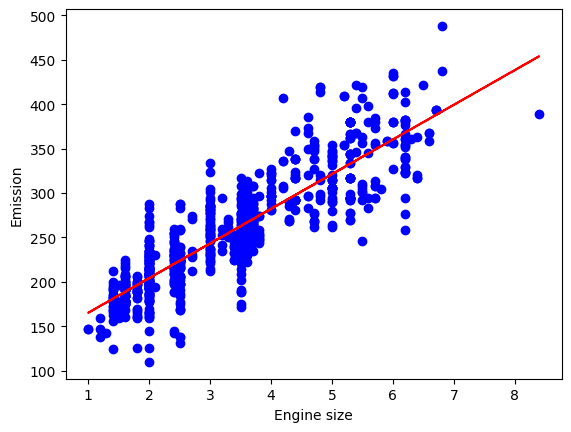

In [17]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train,regressor.coef_*X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

# MODEL EVALUATION

We have different model evaluation metrics.



*   Mean Absolute Error (MAE) - mean of the absolute value of the errors.
*   Mean Squared Error (MSE) - used by the model to find the best fit line, and for that reason, its also called the residual sum of squares.


*   Root Mean Squared Error (RMSE) - transforms the MSE into the same units as the variables being compared, which can make it easier to interpret.
*   R-squared - popular metric used to estimate the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1 and it can be negative (because the model can be arbitrarily worse)




In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

#Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_test_))
print("Mean squared error : %.2f" % mean_squared_error(y_test,y_test_))
print("Root Mean Squared error : %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2 score : %.2f" % r2_score(y_test,y_test_))

Mean absolute error: 24.10
Mean squared error : 985.94
Root Mean Squared error : 31.40
R2 score : 0.76


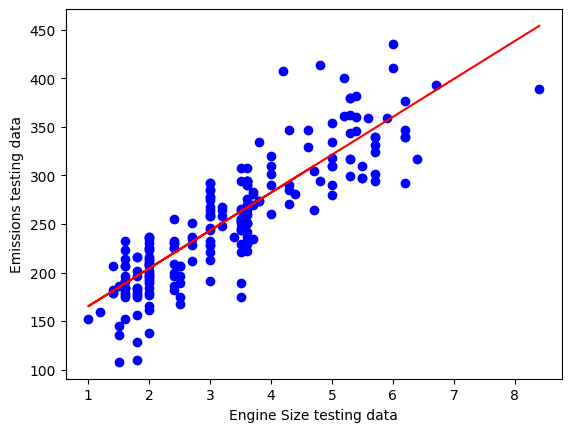

In [21]:
# plotting the regression model result over the test data.

plt.scatter(X_test,y_test,color='blue')
plt.xlabel("Engine Size testing data")
plt.ylabel("Emissions testing data")
plt.plot(X_test, regressor.coef_*X_test+regressor.intercept_,'-r')

# USING A DIFFERENT FEATURE FOR THE REGRESSION MODEL

This time, lets use a different feature instead of Engine size. Lets use FUELCONSUMPTION_COMB feature to train our model and make predictions.

In [22]:
# defining our features and target variables
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [24]:
# splitting our data into training and testing sets in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
# train the linear regression model using the training data we created
regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [26]:
# use this model to make test predictions on the fuel consumption data
y_test_ = regressor.predict(X_test.reshape(-1,1))

In [27]:
# calculate the mean squared error of the test predictions
print("Mean squared error : %.2f" % mean_squared_error(y_test, y_test_))

Mean squared error : 797.43


The MSE is smaller when we train using FUELCONSUMPTION_COMB rather than ENGINESIZE. Let's have a look at the best fitted line on training and testing data.


Text(0, 0.5, 'Emission train')

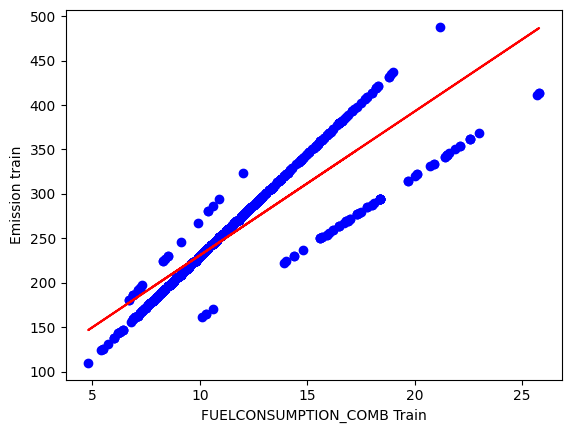

In [28]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train, regressor.coef_*X_train+regressor.intercept_,'-r')
plt.xlabel("FUELCONSUMPTION_COMB Train")
plt.ylabel("Emission train")

Text(0, 0.5, 'Emission test')

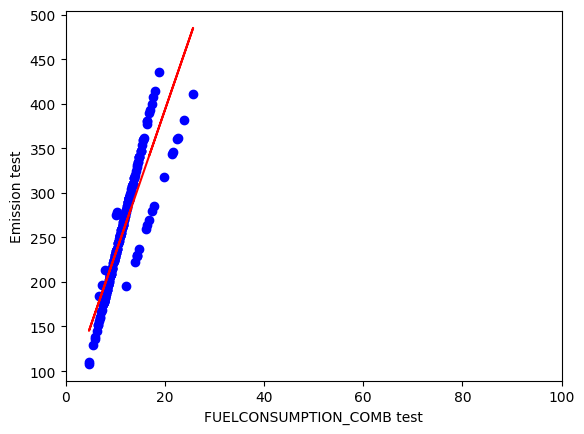

In [30]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_test,regressor.coef_*X_test + regressor.intercept_,'-r')
plt.xlim(0,100)
plt.xlabel('FUELCONSUMPTION_COMB test')
plt.ylabel("Emission test")